## Project Part 2 (a.k.a. Project 2 on Schedule)
While you are learning about evolutionary trees and distance matrices this week in lecture/lab we can get started on pulling together the data we need for our COVID-19 analysis. We can also do some starter analysis. Our goal over the next few weeks will be to clean, refine, and otherwise make detailed, explained, reproducible analysis.

The current complete genomes can be downloaded from here:
https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta

Disclaimers: I definitely expect for the analysis below to change. This isn't a lab. This is a first cut to get us discussing. We need to be critical of this work and look for problems and ways to improve it. We need to be skeptical scientists. We need to dig into the literature not just about the tools, but about the biology itself before putting out potentially misleading information. 

Technical Disclaimers: I've written this to run on my system. I want you to use this notebook as motivation and guidance to approach this weeks project. Some of the things I've done below may or may not be in your data analysis/programming/data science wheel house. That's ok. There is a lot of room for variety. Try to approach this in a genuine way about what you are interested in contributing.

### Guidance (i.e., what you should do)
We've said many times. This project isn't about everyone reaching the same point in a predetermined set of steps. It's about applying what we are learning in class to produce real data analysis for the community. It is about as *Learn by doing* as you could possibly get at Cal Poly. So what should you be doing this week for the project? Here is some guidance (but remember this is only to guide you and not box you into specific tasks). They are in no particular order. 
* Consider what questions we want to ask from our evolutionary tree analysis. Think about what questions the book was trying to answer. Do we even have the data in this notebook to answer some of those questions? If not, spend time trying to find it now that you can know more about what to look for in terms of format. Do some literature searching and see what other work has been done for this virus and others.
* Research and try different evolutionary tree programs/frameworks. What I've done below is not the only game in town by far. Biopython itself has different options.
* Consider the alignment itself. Are there different ways to do this? Did we do it correctly?
* What about the sequences themselves? Are they all of the same quality? Should we exclude some?
* What about the virus alignment program? Did we use that correctly? Should we have done the entire sequence instead of using Spike as a reference? Should we try a different reference. 
* Do we have more data available about the sequences? Part of world, etc. Can we do some digging here to answer different questions.
* And I'm sure you can think of more to attempt... Think about what you want to do. Spend time working towards a well thoughtout goal. Document things as you go. Talk to everyone on Slack. Together we can do this!

### Link to clone the repository
Here is a link to the project repository.

https://github.com/anderson-github-classroom/csc-448-project

The website can be viewed at https://anderson-github-classroom.github.io/csc-448-project/.

### First step is to get the data
We are going to rely on the Galaxy team to pull together our sequence data for now. We might change this later.

In [2]:
import wget

url = 'https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta'
file = '../../current_complete_ncov_genomes.fasta'
wget.download(url, file)

'../../current_complete_ncov_genomes.fasta'

### Virus Alignment
We will use a program specific for viral multiple alignments: https://github.com/rega-cev/virulign-tutorial

https://academic.oup.com/bioinformatics/article/35/10/1763/5123354

I downloaded the Mac binary and put it /Users/panderson/

In [7]:
!git clone https://github.com/rega-cev/virulign.git

Cloning into 'virulign'...


In [12]:
!ls
!ls virulign/build/src/Debug/virulign.exe

Project2.ipynb
Project2.md
Project2.py
home.md
virulign
virulign/build/src/Debug/virulign.exe


I also downloaded the tutorials and the program repository.

In [4]:
!git clone https://github.com/rega-cev/virulign-tutorial ../../virulign-tutorial

Cloning into '../../virulign-tutorial'...


In [5]:
!git clone https://github.com/rega-cev/virulign ../../virulign

Cloning into '../../virulign'...


### Before alignment
As we mentioned in class, we need an alignment so we can derive our pairwise distance scores so we can then put together our distance matrix.

This package contains a reference Spike protein that can be provided as an argument when performing alignment. This code took my computer a few minutes to run, so I've included the output in the project repository: csc-448-project/data/position_table.csv.

In [15]:
!virulign/build/src/Debug/virulign.exe ../../virulign/references/SARS-CoV-2/S.xml ../../current_complete_ncov_genomes.fasta --exportAlphabet Nucleotides --exportKind PositionTable > ../../position_table.csv

'virulign' is not recognized as an internal or external command,
operable program or batch file.


### Read the data into a pandas dataframe

In [17]:
import pandas as pd
position_table = pd.read_csv('../../data/position_table.csv') # or put in the path to csc-448-project/data/position_table.csv

In [21]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,677,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677
unique,677,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT308702.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677


In [20]:
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


### Pull out the concensus sequence

In [22]:
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [24]:
position_table = position_table.set_index('seqid')

KeyError: "None of ['seqid'] are in the columns"

### Determine which samples are farthest from the concensus sequence

In [25]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
distance_from_concensus_seq_sorted

seqid
MT233522.1    82
MT308696.1    71
MT308694.1    53
MT263453.1    48
MT259284.1    33
              ..
MT326081.1     0
MT263395.1     0
MT263396.1     0
MT263398.1     0
MT262916.1     0
Length: 677, dtype: int64

### Select 10 sequences to do our first analysis

In [26]:
subset_seqs = distance_from_concensus_seq_sorted[:10].index
subset_seqs

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT263436.1', 'MT293224.1', 'MT326129.1', 'MT259277.1'],
      dtype='object', name='seqid')

### Construct a distance matrix for our sequences

In [27]:
distances = {}
for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT233522.1,MT259277.1,MT259284.1,MT263436.1,MT263453.1,MT293180.1,MT293224.1,MT308694.1,MT308696.1,MT326129.1
MT233522.1,0,90,115,90,130,104,90,135,151,90
MT259277.1,90,0,43,2,58,32,2,63,79,0
MT259284.1,115,43,0,43,81,47,43,86,104,43
MT263436.1,90,2,43,0,58,32,0,63,79,2
MT263453.1,130,58,81,58,0,68,58,101,119,58
MT293180.1,104,32,47,32,68,0,32,77,93,32
MT293224.1,90,2,43,0,58,32,0,63,79,2
MT308694.1,135,63,86,63,101,77,63,0,22,63
MT308696.1,151,79,104,79,119,93,79,22,0,79
MT326129.1,90,0,43,2,58,32,2,63,79,0


### Utilize biopython
For this analysis we'll use a package called biopython: ``pip install biopython``. 

It has its own formats, so we'll need to convert.

In [31]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
import numpy as np
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

### Now construct our tree

In [32]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

### Now draw our tree

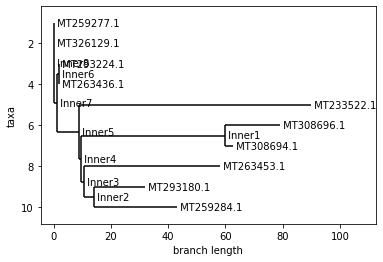

In [33]:
%matplotlib inline

from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

**Please see the guidance at the top of the page for what to try**

Try with all sequences

In [38]:
subset_seqs2 = distance_from_concensus_seq_sorted.index
subset_seqs2

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT263436.1', 'MT293224.1', 'MT326129.1', 'MT259277.1',
       ...
       'MT263382.1', 'MT263383.1', 'MT326086.1', 'MT326085.1', 'MT263388.1',
       'MT326081.1', 'MT263395.1', 'MT263396.1', 'MT263398.1', 'MT262916.1'],
      dtype='object', name='seqid', length=677)

In [39]:
distances = {}
for i,seqid1 in enumerate(subset_seqs2):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs2)):
        seqid2 = subset_seqs2[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020880.1,MT020881.1,MT027062.1,...,MT334538.1,MT334539.1,MT334540.1,MT334541.1,MT334542.1,MT334544.1,MT334546.1,MT334547.1,MT334557.1,MT334561.1
MT007544.1,0,5,1,1,1,1,1,1,1,1,...,1,3,3,2,2,3,2,3,5,3
MT012098.1,5,0,4,4,4,4,4,4,4,4,...,4,6,6,5,5,6,5,6,8,6
MT019529.1,1,4,0,0,0,0,0,0,0,0,...,0,2,2,1,1,2,1,2,4,2
MT019530.1,1,4,0,0,0,0,0,0,0,0,...,0,2,2,1,1,2,1,2,4,2
MT019531.1,1,4,0,0,0,0,0,0,0,0,...,0,2,2,1,1,2,1,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT334544.1,3,6,2,2,2,2,2,2,2,2,...,2,2,2,1,1,0,1,2,4,0
MT334546.1,2,5,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,0,1,3,1
MT334547.1,3,6,2,2,2,2,2,2,2,2,...,2,2,2,1,1,2,1,0,4,2
MT334557.1,5,8,4,4,4,4,4,4,4,4,...,4,4,4,3,3,4,3,4,0,4


In [40]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
import numpy as np
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

In [41]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

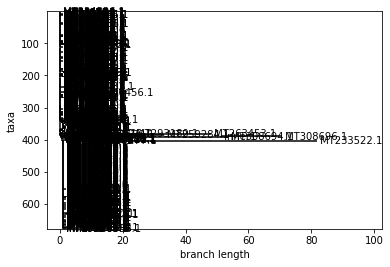

In [42]:
%matplotlib inline

from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

Lots of very similar strains near the base

try with UPGMA instead of NJ

In [43]:
distances = {}
for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT233522.1,MT259277.1,MT259284.1,MT263436.1,MT263453.1,MT293180.1,MT293224.1,MT308694.1,MT308696.1,MT326129.1
MT233522.1,0,90,115,90,130,104,90,135,151,90
MT259277.1,90,0,43,2,58,32,2,63,79,0
MT259284.1,115,43,0,43,81,47,43,86,104,43
MT263436.1,90,2,43,0,58,32,0,63,79,2
MT263453.1,130,58,81,58,0,68,58,101,119,58
MT293180.1,104,32,47,32,68,0,32,77,93,32
MT293224.1,90,2,43,0,58,32,0,63,79,2
MT308694.1,135,63,86,63,101,77,63,0,22,63
MT308696.1,151,79,104,79,119,93,79,22,0,79
MT326129.1,90,0,43,2,58,32,2,63,79,0


In [45]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
import numpy as np
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

In [46]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

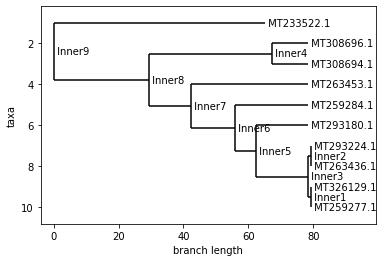

In [47]:
from Bio import Phylo
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

Distinctly different tree generated fewer strains shown close to the base of the tree

In [52]:
subset_seqs3 = distance_from_concensus_seq_sorted[:40].index
subset_seqs3

Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
       'MT293180.1', 'MT263436.1', 'MT293224.1', 'MT326129.1', 'MT259277.1',
       'MT263431.1', 'MT293213.1', 'MT293196.1', 'MT326134.1', 'MT293200.1',
       'MT293158.1', 'MT246456.1', 'MT293198.1', 'MT326176.1', 'MT320538.1',
       'MT322421.1', 'MT334557.1', 'MT322422.1', 'MT012098.1', 'MT325596.1',
       'MT322423.1', 'MT246482.1', 'MT326090.1', 'MT259249.1', 'MT263384.1',
       'MT259281.1', 'MT326092.1', 'MT263410.1', 'MT259269.1', 'MT263074.1',
       'MT325575.1', 'MT324062.1', 'MT291836.1', 'MT292570.1', 'MT325615.1'],
      dtype='object', name='seqid')

In [53]:
distances = {}
for i,seqid1 in enumerate(subset_seqs3):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs3)):
        seqid2 = subset_seqs3[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()
distances

,MT012098.1,MT233522.1,MT246456.1,MT246482.1,MT259249.1,MT259269.1,MT259277.1,MT259281.1,MT259284.1,MT263074.1,...,MT324062.1,MT325575.1,MT325596.1,MT325615.1,MT326090.1,MT326092.1,MT326129.1,MT326134.1,MT326176.1,MT334557.1
MT012098.1,0,86,13,7,6,6,14,6,37,6,...,6,6,8,6,7,6,14,13,12,8
MT233522.1,86,0,91,85,82,84,90,82,115,82,...,82,84,84,82,83,82,90,91,90,84
MT246456.1,13,91,0,12,11,11,19,11,42,11,...,11,11,13,11,12,11,19,18,17,13
MT246482.1,7,85,12,0,5,5,13,5,36,5,...,5,5,7,5,6,5,13,12,11,7
MT259249.1,6,82,11,5,0,4,10,2,35,2,...,2,4,4,2,3,2,10,11,10,4
MT259269.1,6,84,11,5,4,0,12,4,35,4,...,4,4,6,4,5,4,12,11,10,6
MT259277.1,14,90,19,13,10,12,0,10,43,10,...,10,12,12,10,11,10,0,1,18,12
MT259281.1,6,82,11,5,2,4,10,0,35,2,...,2,4,4,2,3,2,10,11,10,4
MT259284.1,37,115,42,36,35,35,43,35,0,35,...,35,35,37,35,36,35,43,42,41,37
MT263074.1,6,82,11,5,2,4,10,2,35,0,...,2,4,4,2,3,2,10,11,10,4


In [54]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
import numpy as np
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

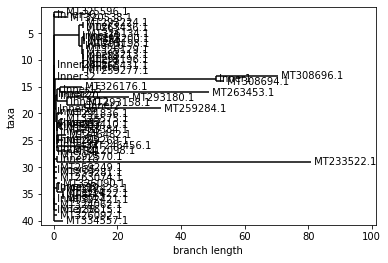

In [55]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
treenj = constructor.nj(dm)
treeupgma = constructor.upgma(dm)
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(treenj)

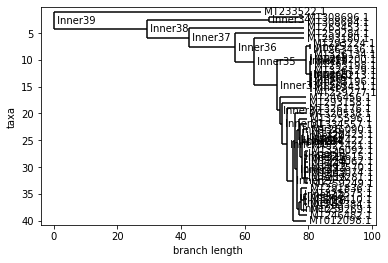

In [56]:
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(treeupgma)

MT233522.1 appears as the farthest out in nj, but as the earliest in upgma

We have examined variations in the spike protein of COVID19. We have used distance metrics that treat a changes in any position of the protein as equally important. While reasonable for phylogenetic research it is not true that all changes are equally likely, or that all changes are equally important.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7151553/ provides a recent summary of mutation patterns in the COVID19 spike protein. Targeting conserved regions may prove an effective therapeutic, since the slowed mutation may indicate important (difficult to change) sections of the protein.

In [2]:
import pandas as pd
position_table = pd.read_csv('../../data/position_table.csv') # or put in the path to csc-448-project/data/position_table.csv

In [6]:
num_mutations = position_table.nunique()[1:]

In [7]:
max(list(num_mutations))

3

(array([3456.,    0.,    0.,    0.,    0.,  356.,    0.,    0.,    0.,
           7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

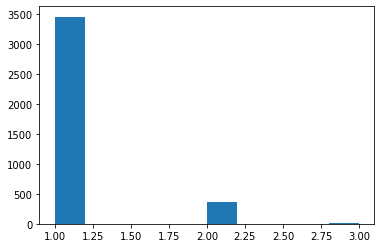

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(num_mutations)

In [13]:
total = 7+356+3456
print(7/356)
print(356/3456)
print(7/total, 356/total, 3456/total)

0.0196078431372549
0.1032986111111111
0.001832940560356114 0.09321811992668237 0.9049489395129615


In [20]:
expected3 = (356/total)*(356/total)*total
expected2 = (356/total)*total
expected1 = (1-356/total)*total

In [21]:
xi2 = ((7 - expected3)**2)/expected3 + ((356-expected2)**2)/expected2 + ((3456-expected1)**2)/expected1
xi2

20.676342062839893

In [24]:
(((7 - expected3)**2)/expected3, ((356-expected2)**2)/expected2, ((3456-expected1)**2)/expected1)

(20.662192481551994, 0.0, 0.014149581287900665)

the xi squared statistic for 1% chance of occurance with degree of freedom 2 (3-1) is 9.21. We exceed this. So we reject the null with greater than 99% confidence.
We used the null hypothesis of a exponential distribution that perfectly matches the distribution at 2

In [26]:
import math

prob = math.sqrt((7/total))
expected3 = prob*prob*total
expected2 = prob*total
expected1 = (1-prob)*total

In [27]:
xi2 = ((7 - expected3)**2)/expected3 + ((356-expected2)**2)/expected2 + ((3456-expected1)**2)/expected1
xi2

237.52267930094072

In [28]:
prob = 1-(3456/total)
expected3 = prob*prob*total
expected2 = prob*total
expected1 = (1-prob)*total

In [29]:
xi2 = ((7 - expected3)**2)/expected3 + ((356-expected2)**2)/expected2 + ((3456-expected1)**2)/expected1
xi2

22.058665526200517

In [ ]:
other reasonable hypotheses are equally bad

(array([5.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.031e+03, 3.950e+02,
        1.550e+02, 5.900e+01, 5.600e+01, 1.180e+02]),
 array([0.02472867, 0.24052796, 0.45632725, 0.67212653, 0.88792582,
        1.10372511, 1.31952439, 1.53532368, 1.75112297, 1.96692225,
        2.18272154]),
 <a list of 10 Patch objects>)

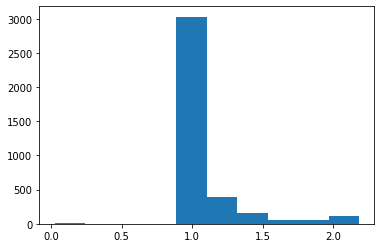

In [43]:
import numpy as np
gaus_size = 9
alpha = 0.1
gaus_filter = np.exp(-alpha*(np.arange(gaus_size) - gaus_size/2)**2)
gaus_filter = gaus_filter / np.sum(gaus_filter)
gaus_filter = gaus_filter / np.sum(gaus_filter)
local_mutations = np.convolve(np.array(list(num_mutations)), gaus_filter)
plt.hist(local_mutations)

In [44]:
gaus_filter

array([0.02472867, 0.05503467, 0.10027971, 0.14959974, 0.18272154,
       0.18272154, 0.14959974, 0.10027971, 0.05503467])